In [1]:
#Predict smallest Number

#!conda install -n mldds -c anaconda joblib
import os
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

import multiprocessing
num_cores = multiprocessing.cpu_count()

print("Cores: ", num_cores)

import time
import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
# import tensorflow as tf
# config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': num_cores} )
# sess = tf.Session(config=config) 
# keras.backend.set_session(sess)

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from MyTotoResearchv4 import *



Cores:  6


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/opt/conda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/opt/conda/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4900: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jovyan/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __nam

Done.


In [2]:
def getAllData(df):
    drop_cols = ['T', 'D', 'N1','N2','N3','N4','N5','N6','N7','L','M','S','R','E','A','V' ,'J','U']
    drop_cols = ['D', 'N1','N2','N3','N4','N5','N6','N7', 'Ph', 'il', 'age', 'dist', 'adia', 'sundist', 'sunadia' ]

#     Ph         1521 non-null float64
# il         1521 non-null float64
# age        1521 non-null float64
# dist       1521 non-null float64
# adia       1521 non-null float64
# sundist    1521 non-null float64
# sunadia    1521 non-null float64

#    drop_cols = ['T', 'D', 'M','S','R','E','A','V' ,'J','U']


    X = df.drop(drop_cols, axis=1)
    
    X = df[['T','L','M','S','R','E','A','V']]
    X = df[[ 'T','L','M','S','il', 'age', 'dist', 'adia', 'sundist', 'sunadia']]

#     df1 = df[['N1','N2','N3','N4','N5','N6','N7']]
#     X['smallest'] = df1.min(axis=1)
#     X['biggest'] = df1.max(axis=1)

    return X


def getSmallestN(df):
    df1 = df[['N1','N2','N3','N4','N5','N6','N7']]
    y = pd.DataFrame(index=df.index)
    y['SN'] = df1.min(axis=1)
    return y ;

def getBiggestN(df):
    df1 = df[['N1','N2','N3','N4','N5','N6','N7']]
    y = pd.DataFrame(index=df.index)
    y['LN'] = df1.max(axis=1)
    return y ;



In [3]:
seed = 42

mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()

X = mtr.modified_dataset(getAllData(df)) #

#X

#getSmallestN(df)
#getBiggestN(df)

Loaded MyTotoResearch algo_no:  1
1521
             D  N1  N2  N3  N4  N5  N6  N7
0     20040212  42  36  29  21  18  10   3
1     20040216  45  41  40  39  22   8   6
2     20040219  36  35  21  17  15   8   5
3     20040223  39  38  28  23  21  20   6
4     20040226  44  40  26  25  16  10   3
5     20040301  29  28  27  25  22  20  14
6     20040304  43  41  40  25   7   6   2
7     20040308  44  42  21  19  18  17   2
8     20040311  43  36  34  26  24  18  10
9     20040315  45  35  32  16  13   9   1
10    20040318  43  42  40  31  21  17   6
11    20040322  35  28  27  23  22  21  16
12    20040325  43  38  37  20  18  13   6
13    20040329  32  24  19   7   6   2   1
14    20040401  40  39  31  28  27   9   3
15    20040405  33  16  15  13  12   7   4
16    20040408  39  36  33  30  25  11   4
17    20040412  37  32  29  16  10   8   2
18    20040415  34  32  26  19   9   3   2
19    20040419  45  39  36  26  18  15  10
20    20040422  37  26  23  14   8   6   5
21    20040426 

In [46]:
model_result = {}
def store_model_result(sEstimator, N, r):
#    print(sEstimator + " " + N )
    if ( sEstimator not in model_result ):
        model_result[sEstimator] = pd.DataFrame(index=df.index) 
    m_df = model_result[sEstimator] ;
    m_df[N] = r
    return m_df
    


In [40]:
from itertools import product
data = [[1,2,3],[4,5,6],[7,8,9],[10,11,23]]
def helperMethod(oldCombination, row, col):
    newCombination = oldCombination + str(data[row][col]);
    if (row == len(data) - 1):
        print(newCombination);
    if (row < len(data) - 1):
        helperMethod(newCombination, row + 1, 0);
    if (col < len(data[row]) - 1):
        helperMethod(oldCombination, row, col + 1);
#    print(row,col,oldCombination)
#     if ( row == 1 and oldCombination == "" ):
#         return ;

#helperMethod("",0, 0);



In [6]:
from itertools import product
data = [[1,2,3],[4,5,6],[7,8,9],[10,11,23]]

data_comb = []
def getYColumn(oldCombination, row, col):
#     if ( len(oldCombination) > 0 ):
#         oldCombination = oldCombination + ","
    newCombination = oldCombination + str(data[row][col]) + ","
    if (row == len(data) - 1):
#        print(newCombination.split(","));
        data_comb.append(newCombination[0:-1].split(",")) ;
    if (row < len(data) - 1):
        getYColumn(newCombination, row + 1, 0);
    if (col < len(data[row]) - 1):
        getYColumn(oldCombination, row, col + 1);

getYColumn("",0, 1);
print(data_comb)

[['2', '4', '7', '10'], ['2', '4', '7', '11'], ['2', '4', '7', '23'], ['2', '4', '8', '10'], ['2', '4', '8', '11'], ['2', '4', '8', '23'], ['2', '4', '9', '10'], ['2', '4', '9', '11'], ['2', '4', '9', '23'], ['2', '5', '7', '10'], ['2', '5', '7', '11'], ['2', '5', '7', '23'], ['2', '5', '8', '10'], ['2', '5', '8', '11'], ['2', '5', '8', '23'], ['2', '5', '9', '10'], ['2', '5', '9', '11'], ['2', '5', '9', '23'], ['2', '6', '7', '10'], ['2', '6', '7', '11'], ['2', '6', '7', '23'], ['2', '6', '8', '10'], ['2', '6', '8', '11'], ['2', '6', '8', '23'], ['2', '6', '9', '10'], ['2', '6', '9', '11'], ['2', '6', '9', '23'], ['3', '4', '7', '10'], ['3', '4', '7', '11'], ['3', '4', '7', '23'], ['3', '4', '8', '10'], ['3', '4', '8', '11'], ['3', '4', '8', '23'], ['3', '4', '9', '10'], ['3', '4', '9', '11'], ['3', '4', '9', '23'], ['3', '5', '7', '10'], ['3', '5', '7', '11'], ['3', '5', '7', '23'], ['3', '5', '8', '10'], ['3', '5', '8', '11'], ['3', '5', '8', '23'], ['3', '5', '9', '10'], ['3', '5',

In [24]:
from itertools import product
data = [[1,2,3],[4,5,6],[7,8,9],[10,11,23]]
getYLimited_start_pos = 0
data_comb = []
def getYLimited(oldCombination, row, col, howmany):
    global getYLimited_start_pos
    newCombination = oldCombination + str(data[row][col]) + ","
    if (row == len(data) - 1):
        if ( getYLimited_start_pos <= 0 ):
            data_comb.append(newCombination[0:-1].split(","))
        getYLimited_start_pos = getYLimited_start_pos - 1
    if ( len(data_comb) == howmany ):
        return ;
    if (row < len(data) - 1):
        getYLimited(newCombination, row + 1, 0, howmany);
    if (col < len(data[row]) - 1):
        getYLimited(oldCombination, row, col + 1, howmany);

data_comb = []
getYLimited_start_pos = 0
getYLimited("",0, 1, 11);
print(data_comb)
getYLimited_start_pos = 0
data_comb = []
max_comb = 5
getYLimited("",0, 1, 5);
print(data_comb)
getYLimited_start_pos = 5
data_comb = []
getYLimited("",0, 1, 5);
print(data_comb)
getYLimited_start_pos = 10
data_comb = []
getYLimited("",0, 1, 3);
print(data_comb)

[['2', '4', '7', '10'], ['2', '4', '7', '11'], ['2', '4', '7', '23'], ['2', '4', '8', '10'], ['2', '4', '8', '11'], ['2', '4', '8', '23'], ['2', '4', '9', '10'], ['2', '4', '9', '11'], ['2', '4', '9', '23'], ['2', '5', '7', '10'], ['2', '5', '7', '11']]
[['2', '4', '7', '10'], ['2', '4', '7', '11'], ['2', '4', '7', '23'], ['2', '4', '8', '10'], ['2', '4', '8', '11']]
[['2', '4', '8', '23'], ['2', '4', '9', '10'], ['2', '4', '9', '11'], ['2', '4', '9', '23'], ['2', '5', '7', '10']]
[['2', '5', '7', '11'], ['2', '5', '7', '23'], ['2', '5', '8', '10']]


[[ 42.  36.  29. ...,  18.  10.   3.]
 [ 45.  41.  40. ...,  22.   8.   6.]
 [ 36.  35.  21. ...,  15.   8.   5.]
 ..., 
 [ 44.  37.  30. ...,  16.  10.   8.]
 [ 37.  35.  29. ...,  21.  13.   7.]
 [ 49.  46.  45. ...,  24.  17.   5.]]
1 DT0 Accuracy:  15.09433962264151


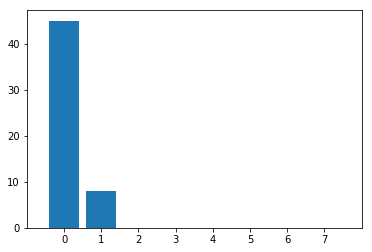

1 DT1 Accuracy:  20.754716981132077


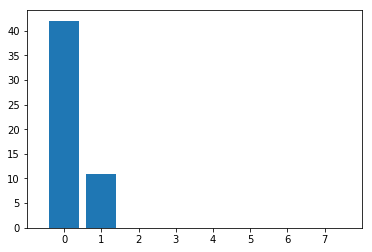

1 DT3 Accuracy:  22.641509433962266


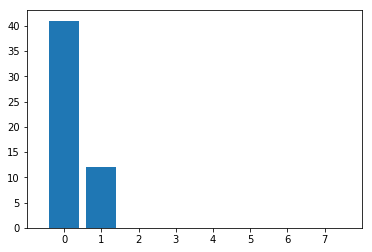

1 DT4 Accuracy:  24.528301886792452


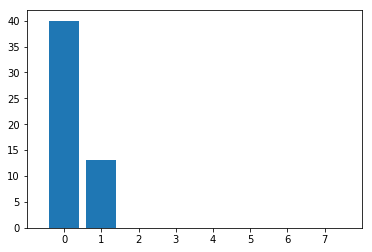

1 DT78 Accuracy:  26.41509433962264


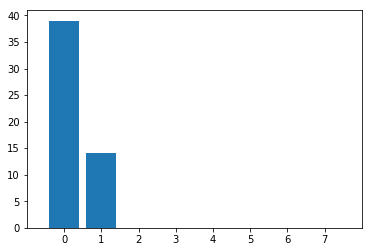

1 DT306 Accuracy:  28.30188679245283


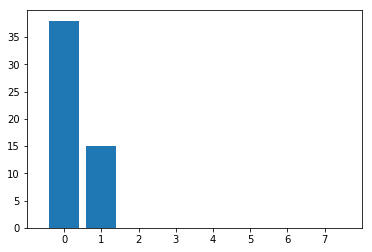

4 DT82 Accuracy:  32.075471698113205


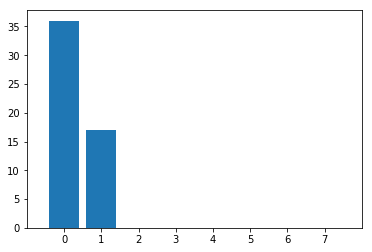

390 DT345 Accuracy:  33.9622641509434


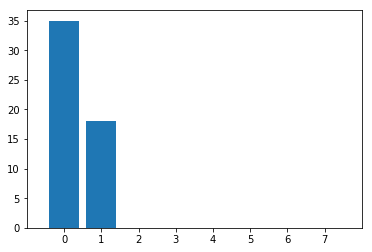

KeyboardInterrupt: 

In [60]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor, SGDClassifier, LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor


# scaler = StandardScaler()
# scaler.fit(X.drop('T',axis=1))

# X_scaled = scaler.transform(X.drop('T',axis=1))
X_scaled = X

l_encoder = LabelEncoder()
result = pd.DataFrame(index=df.index)
result['T'] = df['T']

test_data = mtr.get_test_data()

y_combination = pd.DataFrame(index=df.index)
for i in range(1,8):
     y_combination['N'+str(i)] = df['N'+str(i)]
#y_combination.reset_index()
data = y_combination.values

print(data)

dt = LinearRegression(fit_intercept=False) # 22.65% intersection
dt = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=3) ;
max_comb = 500
model_result = {}
bBest = 0.0
for idx in range(1,100000):
    data_comb = []
    getYLimited_start_pos = (idx-1) + max_comb
    getYLimited("",0, 0, max_comb);
#    print(data_comb)
    getYLimited_start_pos = idx * max_comb
#    for deg in range(2,4):
    for y_c in range(0,len(data_comb)):
        sEstimator = "DT" + str(y_c)
        #     model = Pipeline([('poly', PolynomialFeatures(degree=deg)),
        #                       ('linear', AdaBoostRegressor(random_state=seed,base_estimator=dt,learning_rate=1))])
        model = dt ;
        model.fit(X_scaled, data_comb[y_c])
        p = store_model_result(sEstimator, "N", model.predict(X_scaled).round())

#    print(p)
#     dt = DecisionTreeRegressor()
#     dt = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=3) ;
        bAccuracy = mtr.getAccuracyCount(np.array(p)) ;
        if ( bBest < bAccuracy ):
            print ( str(idx) + " " + sEstimator + " Accuracy: ",  bAccuracy)
            bBest = bAccuracy
            mtr.plot_matched_counts(p.values)
    #        mtr.print_predictions(result)

print("Done.")

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor, SGDClassifier, LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor


scaler = StandardScaler()
scaler.fit(X.drop('T',axis=1))

X_scaled = scaler.transform(X.drop('T',axis=1))
X_scaled = X

l_encoder = LabelEncoder()
result = pd.DataFrame(index=df.index)
result['T'] = df['T']

test_data = mtr.get_test_data()

import array as arr

model_store = []
model_2nd = []

model_result = {}


for i in range(1,10):
    y = pd.DataFrame(index=df.index)
    
#    y['N'+str(i)] = l_encoder.fit_transform(df['N'+str(i)])

    if (i == 8):
        y = getSmallestN(df)
    else:
        if (i == 9):
            y = getBiggestN(df)
        else:
            y['N'+str(i)] = df['N'+str(i)]

    y = y.values.ravel()

    sEstimator = "GBR"
    model = GradientBoostingRegressor(random_state=seed, learning_rate=1, n_estimators=350, max_depth=3)
    model.fit(X_scaled, y)
    result['N'+str(i)+'_GBR1'] = model.predict(X_scaled).round()
    store_model_result(sEstimator, "N" + str(i), model.predict(X_scaled).round())            
    dt = LinearRegression(fit_intercept=False) # 22.65% intersection
    dt = DecisionTreeRegressor()
    dt = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=3) ;
#     dt = LinearRegression(fit_intercept=True) #  37% intersection

#     dt = Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=3000,
#        normalize=False, positive=False, precompute=False, random_state=seed,
#        selection='cyclic', tol=0.01, warm_start=False) #22%
    

    for deg in range(2,4):
        sEstimator = "ABR" + str(deg)
        model = Pipeline([('poly', PolynomialFeatures(degree=deg)),
                          ('linear', AdaBoostRegressor(random_state=seed,base_estimator=dt,learning_rate=1))])
        model.fit(X_scaled, y)
        model_store.append(model)
        result['N'+str(i)+'_PR1'] = model.predict(X_scaled).round()
        store_model_result(sEstimator, "N" + str(i), model.predict(X_scaled).round())

#     result['N'+str(i)+'_P0'] = result['N'+str(i)+'_P'].apply(np.ceil)
#     result['N'+str(i)+'_P1'] = result['N'+str(i)+'_P'].apply(np.floor)



#print(result)

#df['Predicted'] = model.predict(X_scaled)
#df['Y'] = y
#df['Y'] = l_encoder.inverse_transform(y)

#print(df.loc[:,['Predicted', 'Y']])

# print ( "Accuracy: ",  mtr.getAccuracyCount(np.array(result)))
# mtr.plot_matched_counts(result.values)
# mtr.print_predictions(result)

print("Done.")

GBR N1
ABR2 N1
ABR3 N1
GBR N2
ABR2 N2
ABR3 N2
GBR N3
ABR2 N3
ABR3 N3
GBR N4
ABR2 N4
ABR3 N4
GBR N5
ABR2 N5
ABR3 N5
GBR N6
ABR2 N6
ABR3 N6
GBR N7
ABR2 N7
ABR3 N7
GBR N8
ABR2 N8
ABR3 N8
GBR N9
ABR2 N9
ABR3 N9
Done.


In [34]:
already_printed = {}
bBest = 0.0
print ( "BEST INTERSECTION")
for key1, value1 in model_result.items():
    for key2, value2 in model_result.items():
        if ( key1 != key2 ):
            if ( (key1 + key2) not in already_printed ):
                if ( (key2 + key1) not in already_printed ) :
                    already_printed[key1+key2] = 'Y'
                    p = mtr.getIntersection(value1.values, value2.values)
                    bAccuracy = mtr.getAccuracyCount(np.array(p)) ;
                    if ( bBest < bAccuracy ):
                        print ( key1, key2, " Accuracy: ",  bAccuracy)
                        bBest = bAccuracy
                        mtr.plot_matched_counts(p)
#                        mtr.print_predictionsV2(np.array(p))



BEST INTERSECTION


BEST UNION
ABR2 ABR3  Accuracy:  35.84905660377358


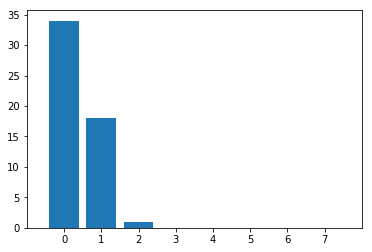

20180514   [17 24 29 45 46 49  5]   [ 39.]   []
20180517   [ 7 21 25 29 35 37 13]   [ 38.  41.]   []
20180521   [ 8 10 16 30 37 44 17]   [ 39.  40.]   []
20180524   [11 25 26 34 36 42 16]   [ 40.  43.]   []
20180528   [ 5  9 27 28 30 44  2]   [ 37.  42.]   []
20180531   [11 13 24 26 47 49 33]   [ 38.  39.]   []
20180604   [20 22 31 37 43 45 27]   [ 39.  40.]   []
20180607   [12 20 29 31 37 39 42]   [ 34.  41.]   []
20180611   [16 25 30 37 44 49 34]   [ 32.  38.]   []
20180614   [ 4 29 31 35 42 48  1]   [ 34.  36.]   []
20180618   [11 15 22 23 26 43 25]   [ 35.  37.]   []
20180621   [ 4  6 15 24 30 35 46]   [ 34.  35.]   [35]
20180625   [ 2  5 25 38 44 48  9]   [ 35.  40.]   []
20180628   [ 2  7 22 27 40 47 48]   [ 37.  40.]   [40]
20180702   [12 13 26 33 35 38 23]   [ 40.  42.]   []
20180705   [ 8 11 28 30 32 34 39]   [ 37.]   []
20180709   [ 6 23 31 38 39 43 33]   [ 36.  39.]   [39]
20180712   [ 4 15 25 32 40 41 10]   [ 35.  36.]   []
20180716   [ 4  8 19 24 32 47 22]   [ 38.  42.]   

In [30]:
already_printed = {}
bBest = 0.0
print ( "BEST UNION")
for key1, value1 in model_result.items():
    for key2, value2 in model_result.items():
        if ( key1 != key2 ):
            if ( (key1 + key2) not in already_printed ):
                if ( (key2 + key1) not in already_printed ) :
                    already_printed[key1+key2] = 'Y'
                    p = [np.union1d(a,b) for a,b in zip(value1.values, value2.values)] #mtr.getIntersection(value1.values, value2.values)
                    bAccuracy = mtr.getAccuracyCount(np.array(p)) ;
                    if ( bBest < bAccuracy ):
                        print ( key1, key2, " Accuracy: ",  bAccuracy)
                        bBest = bAccuracy
                        mtr.plot_matched_counts(p)
mtr.print_predictionsV2(np.array(p))



Index(['T'], dtype='object')
             T
0     20040212
1     20040216
2     20040219
3     20040223
4     20040226
5     20040301
6     20040304
7     20040308
8     20040311
9     20040315
10    20040318
11    20040322
12    20040325
13    20040329
14    20040401
15    20040405
16    20040408
17    20040412
18    20040415
19    20040419
20    20040422
21    20040426
22    20040429
23    20040503
24    20040506
25    20040510
26    20040513
27    20040517
28    20040520
29    20040524
...        ...
1491  20180604
1492  20180607
1493  20180611
1494  20180614
1495  20180618
1496  20180621
1497  20180625
1498  20180628
1499  20180702
1500  20180705
1501  20180709
1502  20180712
1503  20180716
1504  20180719
1505  20180723
1506  20180726
1507  20180730
1508  20180802
1509  20180806
1510  20180809
1511  20180813
1512  20180816
1513  20180820
1514  20180823
1515  20180827
1516  20180830
1517  20180903
1518  20180906
1519  20180910
1520  20180913

[1521 rows x 1 columns]
Accuracy:  0.0


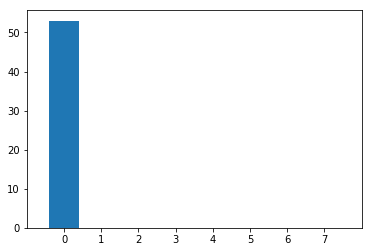

20180514   [17 24 29 45 46 49  5]   []   []
20180517   [ 7 21 25 29 35 37 13]   []   []
20180521   [ 8 10 16 30 37 44 17]   []   []
20180524   [11 25 26 34 36 42 16]   []   []
20180528   [ 5  9 27 28 30 44  2]   []   []
20180531   [11 13 24 26 47 49 33]   []   []
20180604   [20 22 31 37 43 45 27]   []   []
20180607   [12 20 29 31 37 39 42]   []   []
20180611   [16 25 30 37 44 49 34]   []   []
20180614   [ 4 29 31 35 42 48  1]   []   []
20180618   [11 15 22 23 26 43 25]   []   []
20180621   [ 4  6 15 24 30 35 46]   []   []
20180625   [ 2  5 25 38 44 48  9]   []   []
20180628   [ 2  7 22 27 40 47 48]   []   []
20180702   [12 13 26 33 35 38 23]   []   []
20180705   [ 8 11 28 30 32 34 39]   []   []
20180709   [ 6 23 31 38 39 43 33]   []   []
20180712   [ 4 15 25 32 40 41 10]   []   []
20180716   [ 4  8 19 24 32 47 22]   []   []
20180719   [13 14 23 35 37 46 45]   []   []
20180723   [ 2 23 26 28 39 40 12]   []   []
20180726   [ 1  9 13 17 28 40 37]   []   []
20180730   [ 8 10 19 20 41 43  7

In [33]:
columns = result.columns #['N'+str(i)+'_P' for i in range(1,8)]
print(result.columns)
my_prediction = pd.DataFrame(result, columns=columns)

print(my_prediction)
for col in columns:
    my_prediction[col] = my_prediction[col].apply(lambda x: int(x) if x == x else "")
    
#print(my_prediction)
print ( "Accuracy: ",  mtr.getAccuracyCount(np.array(my_prediction)))
mtr.plot_matched_counts(my_prediction.values)
#mtr.print_result(my_prediction)
mtr.print_predictions(my_prediction)


In [13]:
[np.unique1d(a,b) for a,b in zip()]

[]

In [14]:
test_data = mtr.get_test_data()
#X_test = mtr.modified_dataset(getAllData(test_data)) #
X_test = test_data[X.columns]
#scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test.drop('T',axis=1))
#[X.columns])
X_test_scaled = X_test
#[X.columns]
test_result = pd.DataFrame(index=X_test.index)
test_result['T'] = test_data['T']

for i in range(1,8):
    test_result['N'+str(i)+'_P'] = model_store[i-1].predict(X_test_scaled).round()
#     test_result['N'+str(i)+'_P0'] = test_result['N'+str(i)+'_P']-1
#     test_result['N'+str(i)+'_P1'] = test_result['N'+str(i)+'_P']+1


#mtr.print_result(test_result)
mtr.print_predictions(test_result.astype(int))



20180514   [17 24 29 45 46 49  5]   [39 38 34 36 29 30 23]   [29]
20180517   [ 7 21 25 29 35 37 13]   [40 41 34 36 29 30 24]   [29]
20180521   [ 8 10 16 30 37 44 17]   [40 41 34 34 28 30 24]   [30]
20180524   [11 25 26 34 36 42 16]   [39 39 35 34 28 30 24]   [34]
20180528   [ 5  9 27 28 30 44  2]   [41 40 34 34 29 28 24]   [28]
20180531   [11 13 24 26 47 49 33]   [40 40 35 34 29 28 24]   [24]
20180604   [20 22 31 37 43 45 27]   [40 40 35 34 29 29 24]   []
20180607   [12 20 29 31 37 39 42]   [39 41 34 34 29 29 23]   [29 39]
20180611   [16 25 30 37 44 49 34]   [39 39 34 36 29 30 23]   [30 34]
20180614   [ 4 29 31 35 42 48  1]   [40 41 34 33 29 29 24]   [29]
20180618   [11 15 22 23 26 43 25]   [40 41 34 34 28 30 24]   []
20180621   [ 4  6 15 24 30 35 46]   [39 40 35 34 28 30 24]   [24 30 35]
20180625   [ 2  5 25 38 44 48  9]   [41 40 34 34 29 29 24]   []
20180628   [ 2  7 22 27 40 47 48]   [41 40 35 35 29 29 24]   [40]
20180702   [12 13 26 33 35 38 23]   [41 42 35 35 29 29 24]   [35]
2018

In [15]:
predicted_result = np.unique(result.values)
print(result.values)
predicted_result = [np.unique(a) for a in result.values]
len(predicted_result)

[[20040212       42       38 ...,        8       42       38]
 [20040216       45       38 ...,        6       45       38]
 [20040219       36       38 ...,        6       36       38]
 ..., 
 [20180906       44       38 ...,        7       44       38]
 [20180910       37       41 ...,        9       37       41]
 [20180913       49       41 ...,        9       49       41]]


1521